<a href="https://colab.research.google.com/github/QuangHuyLuu/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FINAL PROJECT**

## Diamond price prediction

###I. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### II. Extract Dataset and Get information

#### 1. Read Dataset

In [2]:
diamond_data = pd.read_csv('diamonds.csv')

In [3]:
diamond_data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [5]:
diamond_data.describe()

carat         depth         table         price             x  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.799444     61.753006     57.457830   3944.805440      5.734403   
std        0.475173      1.431088      2.232092   3997.938105      1.123077   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2410.000000      5.700000   
75%        1.040000     62.500000     59.000000   5351.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  50000.000000  50000.000000  
mean       5.737956      3.541056  
std        1.145579      0.707065  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

#### 2. Cleaning Dataset

In [6]:
diamond_data.duplicated().sum()


np.int64(126)

In [7]:
diamond_data1 = diamond_data.drop_duplicates()

In [8]:
diamond_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49874 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49874 non-null  float64
 1   cut      49874 non-null  object 
 2   color    49874 non-null  object 
 3   clarity  49874 non-null  object 
 4   depth    49874 non-null  float64
 5   table    49874 non-null  float64
 6   price    49874 non-null  int64  
 7   x        49874 non-null  float64
 8   y        49874 non-null  float64
 9   z        49874 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


#### 3. EDA

##### 3.1 Distribution of Diamond Price

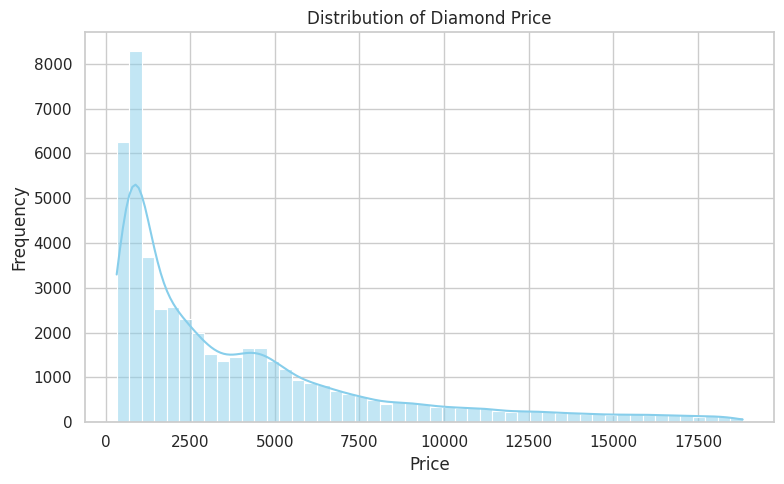

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(diamond_data1['price'], kde=True, bins=50, color="skyblue")
plt.title("Distribution of Diamond Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Bi·ªÉu ƒë·ªì cho th·∫•y gi√° kim c∆∞∆°ng c√≥ **ph√¢n ph·ªëi l·ªách ph·∫£i** r√µ r·ªát:

- Ph·∫ßn l·ªõn kim c∆∞∆°ng c√≥ gi√° t·ª´ **500 ƒë·∫øn 5000 USD**, t·∫≠p trung nhi·ªÅu nh·∫•t trong kho·∫£ng **1000‚Äì2000 USD**.
- C√≥ m·ªôt s·ªë √≠t vi√™n kim c∆∞∆°ng c√≥ gi√° r·∫•t cao (tr√™n 10.000 USD), t·∫°o ra **ƒëu√¥i d√†i v·ªÅ b√™n ph·∫£i**

##### 3.2 Scatter Plot of Price with Quantitative Variables

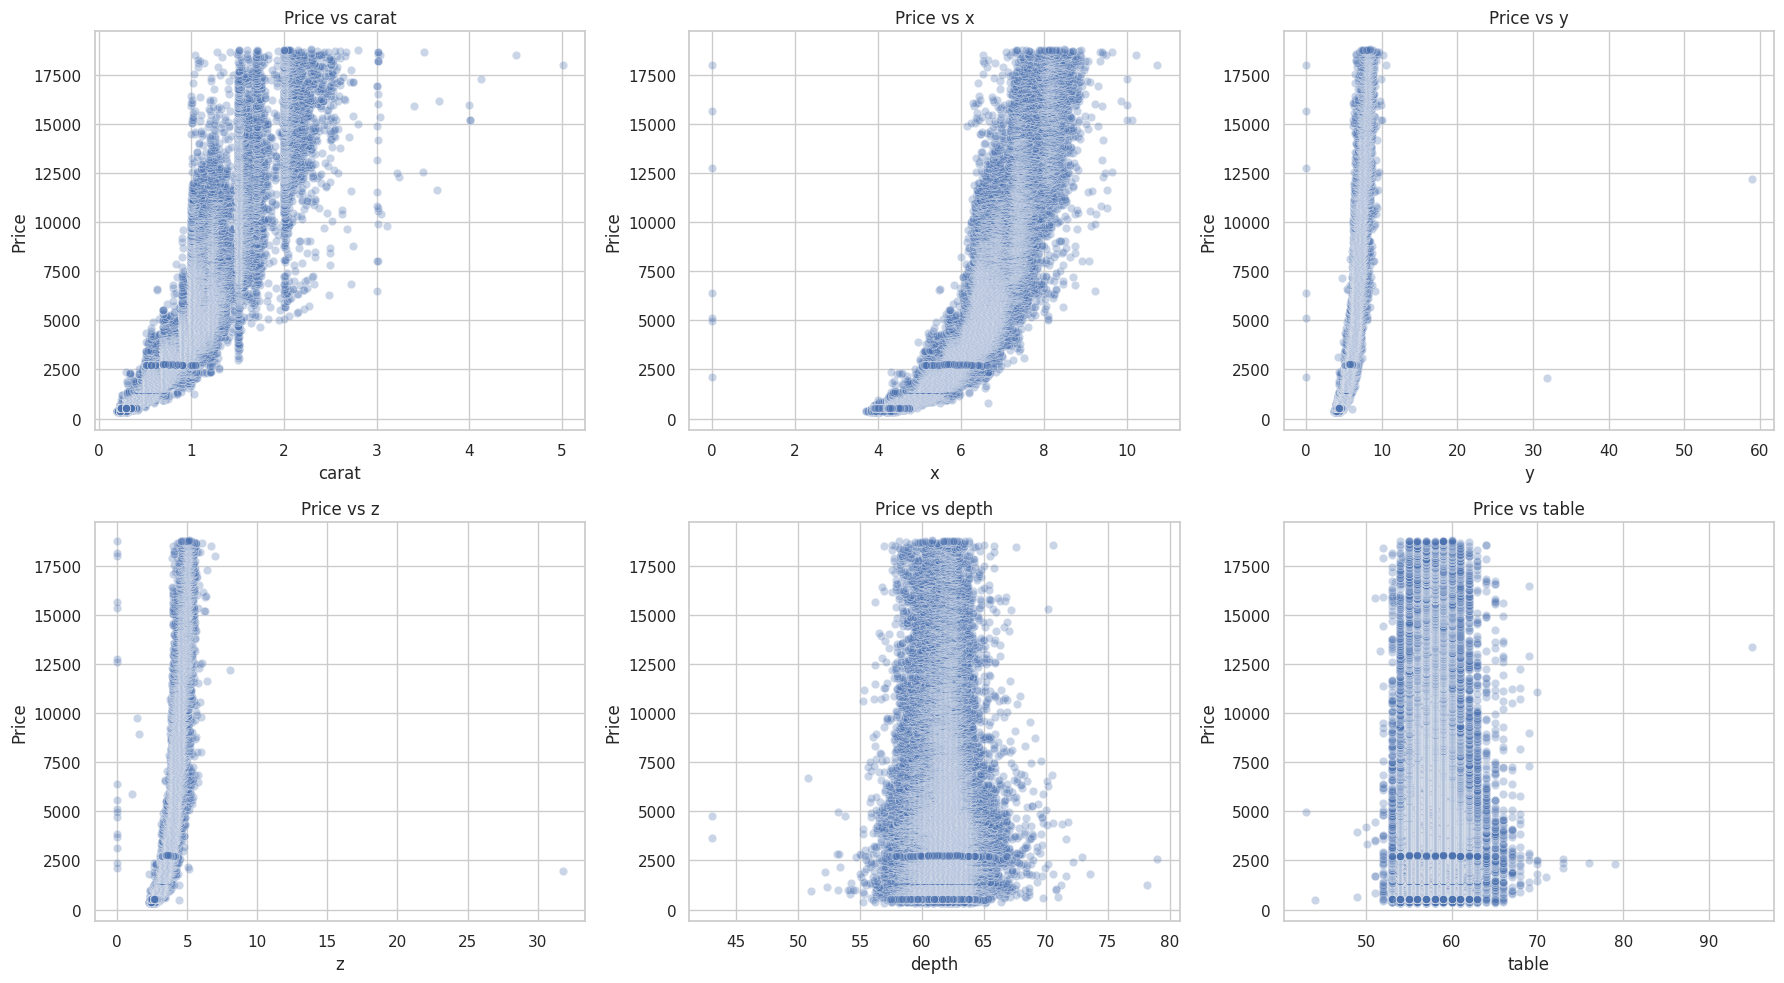

In [10]:
quantitative_vars = ['carat', 'x', 'y', 'z', 'depth', 'table']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, var in enumerate(quantitative_vars):
    sns.scatterplot(data=diamond_data1, x=var, y='price', alpha=0.3, ax=axs[i])
    axs[i].set_title(f'Price vs {var}')
    axs[i].set_ylabel('Price')
    axs[i].set_xlabel(var)

plt.tight_layout()
plt.show()

- `carat`, `x`, `y`, `z` c√≥ **t∆∞∆°ng quan d∆∞∆°ng m·∫°nh v·ªõi price**, ƒë·∫∑c bi·ªát l√† `carat`, cho th·∫•y ch√∫ng l√† nh·ªØng bi·∫øn quan tr·ªçng trong vi·ªác ƒë·ªãnh gi√°.
- ƒê·ªëi v·ªõi `carat` c√≥ m·ªôt s·ªë outliers v·ªõi `carat` > 3.
- `depth` v√† `table` kh√¥ng c√≥ m·ªëi t∆∞∆°ng quan tuy·∫øn t√≠nh r√µ r√†ng v·ªõi price, cho th·∫•y **t·∫ßm ·∫£nh h∆∞·ªüng h·∫°n ch·∫ø** c·ªßa ch√∫ng trong m√¥ h√¨nh d·ª± ƒëo√°n.

In [11]:
diamond_data1 = diamond_data1[(diamond_data1['carat'] <= 3)]

In [12]:
diamond_data1.shape

(49844, 10)

##### 3.3 Box Plot of Price with Categorical variables

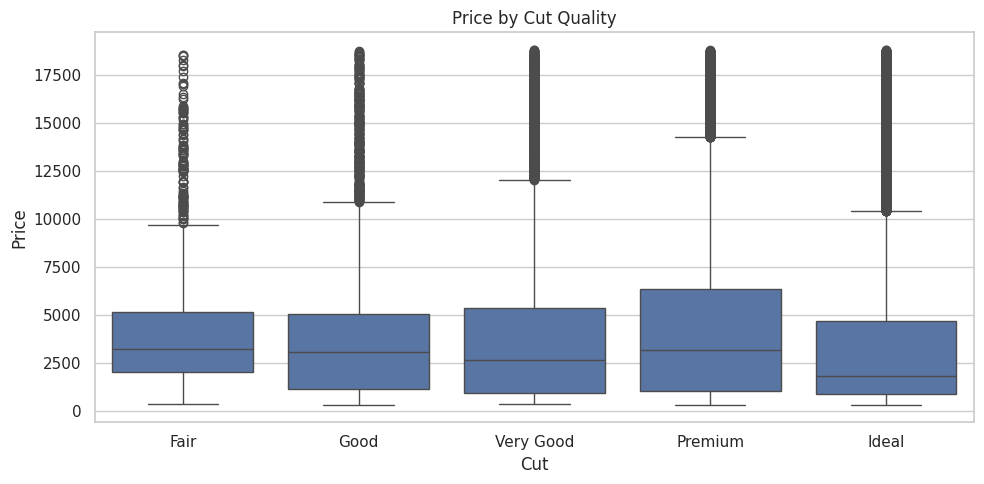

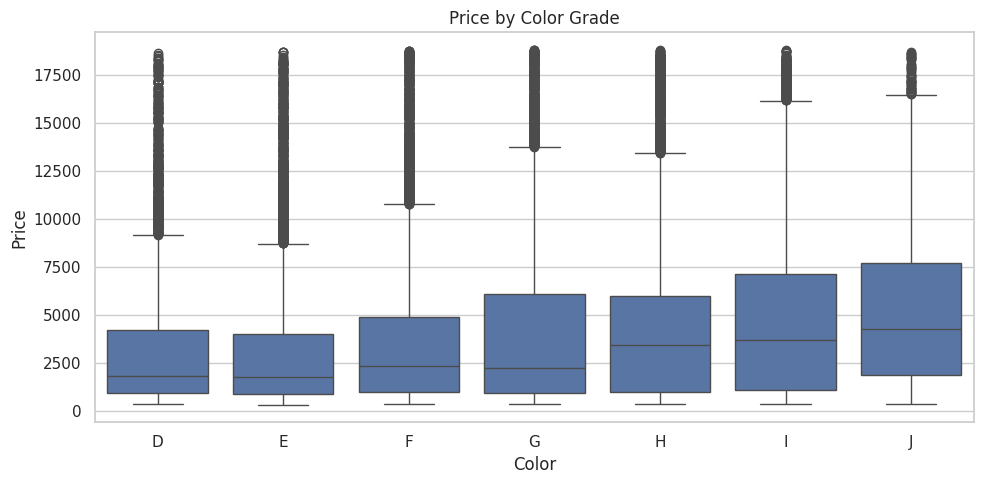

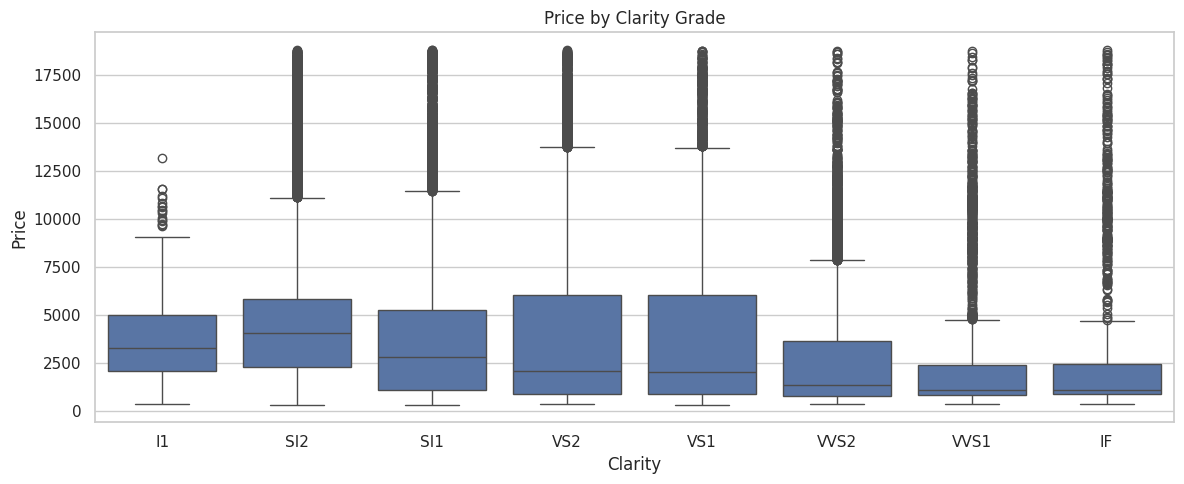

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=diamond_data1, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title("Price by Cut Quality")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=diamond_data1, x='color', y='price', order=list('DEFGHIJ'))
plt.title("Price by Color Grade")
plt.xlabel("Color")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.boxplot(data=diamond_data1, x='clarity', y='price', order=clarity_order)
plt.title("Price by Clarity Grade")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

‚ö†Ô∏è Ghi ch√∫ v·ªÅ Outliers:

- C√°c boxplot tr√™n cho th·∫•y **outliers xu·∫•t hi·ªán r·∫•t nhi·ªÅu ·ªü t·∫•t c·∫£ nh√≥m ph√¢n lo·∫°i**.
- Tuy nhi√™n, vi·ªác lo·∫°i b·ªè outliers c√≥ th·ªÉ **l√†m m·∫•t ƒë√°ng k·ªÉ d·ªØ li·ªáu h·ª£p l·ªá**, ƒë·∫∑c bi·ªát l√† v·ªõi kim c∆∞∆°ng c√≥ gi√° tr·ªã cao.
- Do ƒë√≥, **kh√¥ng lo·∫°i b·ªè outliers**, m√† gi·ªØ nguy√™n to√†n b·ªô d·ªØ li·ªáu ƒë·ªÉ ƒë·∫£m b·∫£o m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c **s·ª± ƒëa d·∫°ng v·ªÅ gi√° v√† ch·∫•t l∆∞·ª£ng** trong th·ªã tr∆∞·ªùng th·ª±c t·∫ø.

##### 3.4 One Hot Encoding

In [14]:
df_encoding = pd.get_dummies(diamond_data1, columns=['cut', 'color', 'clarity'], drop_first=True)


In [15]:
exclude_cols = ['cut', 'color', 'clarity']
diamond_data1_encoded = df_encoding.apply(lambda x: x.astype(int) if x.name not in exclude_cols else x)

In [16]:
diamond_data1_encoded.sample(5)

carat  depth  table  price  x  y  z  cut_Good  cut_Ideal  cut_Premium  \
25615      2     61     55  18508  8  8  5         0          1            0   
26607      0     63     59    678  4  4  2         1          0            0   
4732       1     57     65   3763  6  6  3         1          0            0   
27734      0     61     59    711  4  4  3         0          0            0   
41061      0     59     61   1577  5  5  3         0          0            1   

       ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  \
25615  ...        0        0        1           0            1            0   
26607  ...        0        0        0           0            1            0   
4732   ...        0        0        0           0            0            1   
27734  ...        0        0        0           0            0            1   
41061  ...        0        0        0           0            1            0   

       clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
25615            0            0             0             0  
26607            0            0             0             0  
4732             0            0             0             0  
27734            0            0             0             0  
41061            0            0             0             0  

[5 rows x 24 columns]

#### 4. Correlation

In [17]:
corr_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


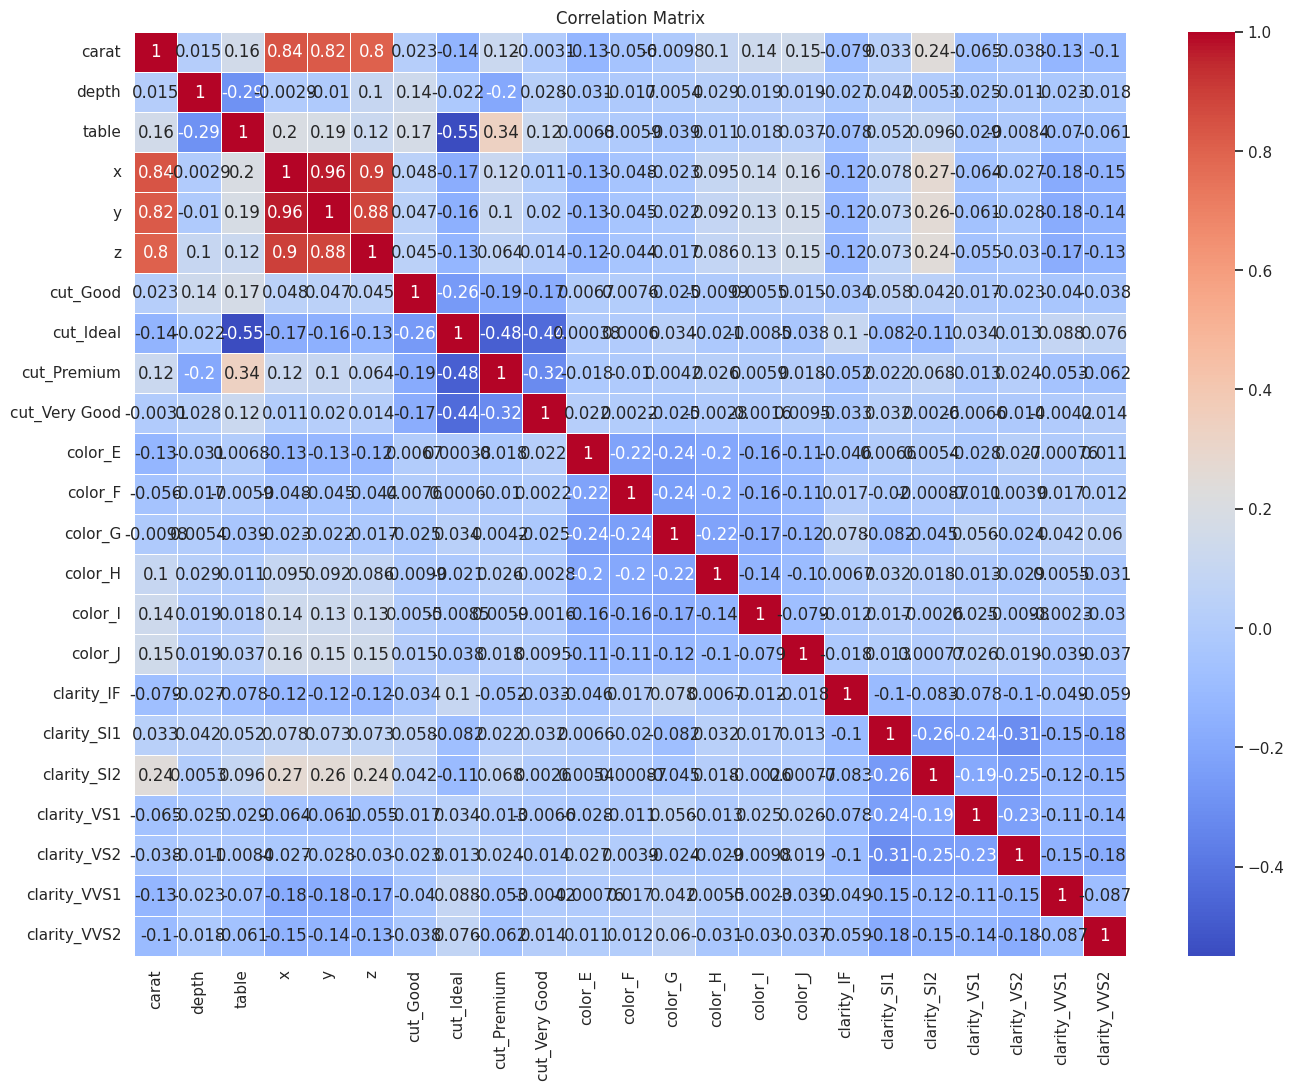

In [18]:
corr_matrix = diamond_data1_encoded[corr_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Ba bi·∫øn `x`, `y`, `z` ƒë·∫°i di·ªán cho chi·ªÅu d√†i, chi·ªÅu r·ªông v√† chi·ªÅu cao c·ªßa vi√™n kim c∆∞∆°ng.
- Tuy nhi√™n, theo ma tr·∫≠n t∆∞∆°ng quan, c·∫£ 3 bi·∫øn n√†y c√≥:
  - **T∆∞∆°ng quan r·∫•t cao v·ªõi nhau** (v√≠ d·ª•: `x` v√† `y` ~0.96),
  - **T∆∞∆°ng quan cao v·ªõi `carat`** (tr√™n 0.8),
  - ƒêi·ªÅu n√†y cho th·∫•y c√≥ hi·ªán t∆∞·ª£ng **ƒëa c·ªông tuy·∫øn cao**, l√†m tƒÉng t√≠nh d∆∞ th·ª´a th√¥ng tin trong m√¥ h√¨nh.

- Ngo√†i ra, trong t·∫≠p d·ªØ li·ªáu ƒë√£ c√≥ bi·∫øn `depth`, ƒë∆∞·ª£c t√≠nh d·ª±a tr√™n `z` chia cho ƒë∆∞·ªùng k√≠nh trung b√¨nh ‚Üí ph·∫ßn n√†o ƒë√£ ph·∫£n √°nh t·ª∑ l·ªá k√≠ch th∆∞·ªõc.

‚úÖ **K·∫øt lu·∫≠n**: ƒê·ªÉ gi·∫£m ƒëa c·ªông tuy·∫øn, ƒë∆°n gi·∫£n h√≥a m√¥ h√¨nh v√† tr√°nh tr√πng l·∫∑p th√¥ng tin, quy·∫øt ƒë·ªãnh **lo·∫°i b·ªè c√°c bi·∫øn `x`, `y`, `z`** kh·ªèi t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán.

In [19]:
diamond_data1_encoded.drop(columns=['x','y','z'], axis=1, inplace=True)

In [20]:
diamond_data1_encoded.shape

(49844, 21)

In [21]:
corr_columns1 = ['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


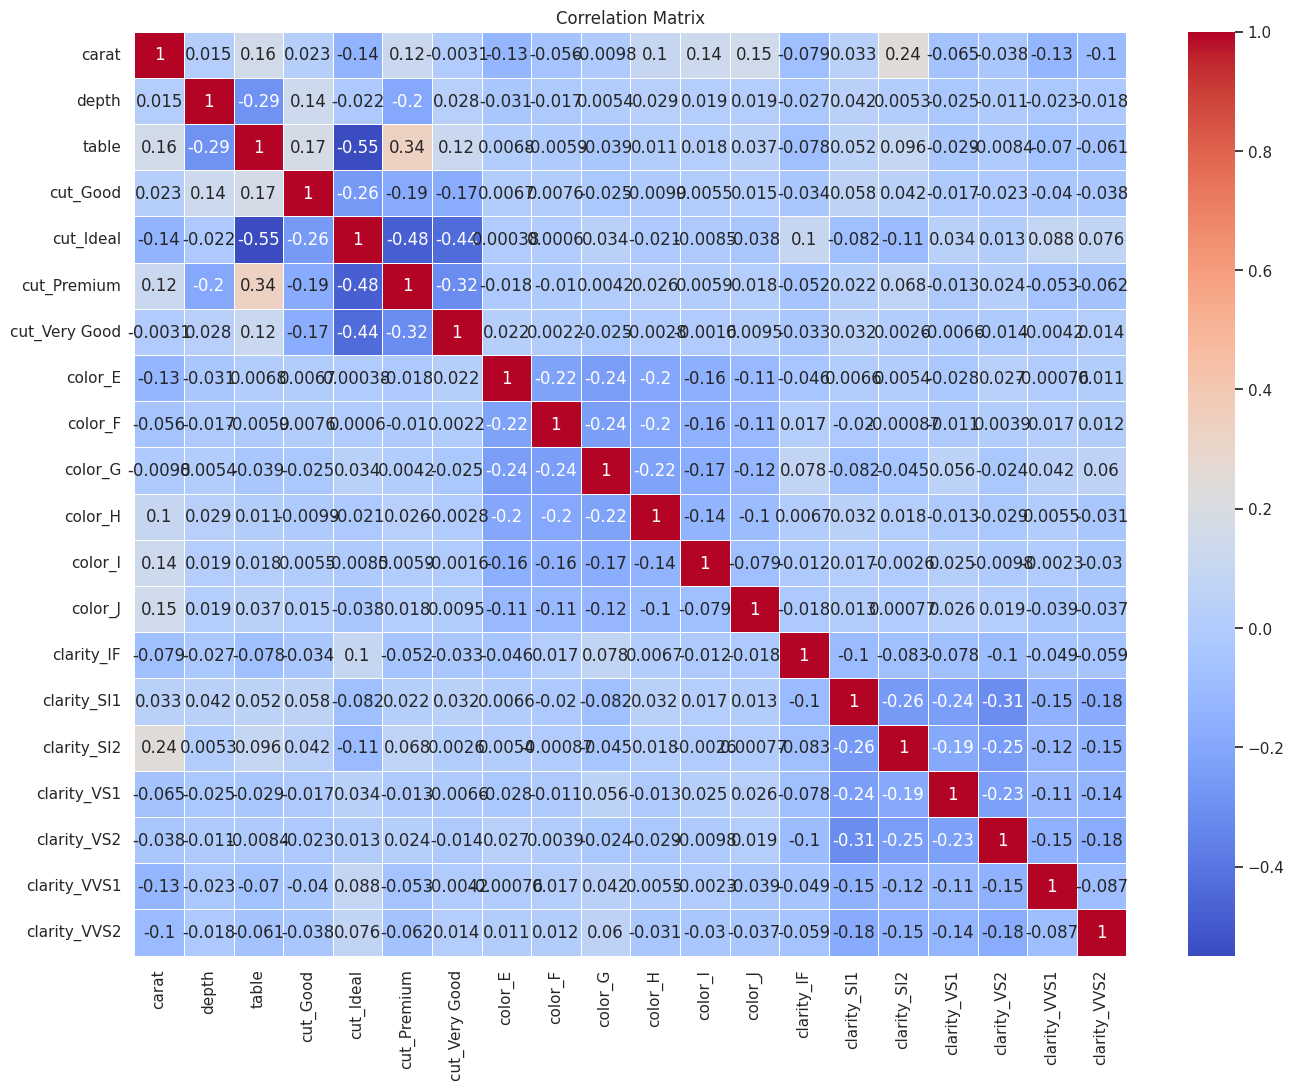

In [22]:
corr_matrix = diamond_data1_encoded[corr_columns1].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Kh√¥ng c√≥ c·∫∑p bi·∫øn n√†o c√≥ h·ªá s·ªë t∆∞∆°ng quan tuy·ªát ƒë·ªëi > 0.8.

‚úÖ **K·∫øt lu·∫≠n**: B·ªô bi·∫øn sau khi lo·∫°i `x`, `y`, `z` l√† h·ª£p l√Ω. C√°c bi·∫øn ph√¢n lo·∫°i sau one-hot encoding c√≥ m·ªëi quan h·ªá ph√π h·ª£p, kh√¥ng g√¢y ƒëa c·ªông tuy·∫øn nghi√™m tr·ªçng. C√≥ th·ªÉ s·ª≠ d·ª•ng tr·ª±c ti·∫øp ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh.

#### 5. Modeling

##### 5.1 Linear Regression

In [23]:
# test 1
import statsmodels.api as sm
X = diamond_data1_encoded.drop(columns=['price'])
y = diamond_data1_encoded['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     7617.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        08:25:39   Log-Likelihood:            -4.4908e+05
No. Observations:               49844   AIC:                         8.982e+05
Df Residuals:                   49823   BIC:                         8.984e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3063.5699    652.207     -4.697

`depth`, `color_F` do not fit the model

In [24]:
#test 2
X = diamond_data1_encoded.drop(columns=['price', 'depth', 'color_F'])
y = diamond_data1_encoded['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     8462.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        08:25:45   Log-Likelihood:            -4.4908e+05
No. Observations:               49844   AIC:                         8.982e+05
Df Residuals:                   49825   BIC:                         8.984e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3682.6387    298.113    -12.353

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = np.mean((y_test - predictions) ** 2)
rmse = np.sqrt(mse)

print('Linear Regression R2:', r2)
print('Linear Regression RMSE:', rmse)

Linear Regression R2: 0.7561641550738039
Linear Regression RMSE: 1960.384738766023


##### 5.2 Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R2: {r2_rf:.4f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest R2: 0.8025
Random Forest RMSE: 1794.67


##### 5.3 XGBoost

In [29]:
pip install xgboost


In [30]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R2: {r2_xgb:.4f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

XGBoost R2: 0.8180
XGBoost RMSE: 1722.69


##### 5.4 LightGBM

In [32]:
pip install lightgbm

In [60]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)

lgb_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60
[LightGBM] [Info] Number of data points in the train set: 39875, number of used features: 18
[LightGBM] [Info] Start training from score 3948.291887


LGBMRegressor(random_state=42)

In [61]:
y_pred_lgb = lgb_model.predict(X_test)

r2_lgb = r2_score(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"LightGBM R2: {r2_lgb:.4f}")
print(f"LightGBM RMSE: {rmse_lgb:.2f}")

LightGBM R2: 0.8056
LightGBM RMSE: 1742.46


In [62]:
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'R2 Score': [0.7561, 0.8025, 0.8180, 0.8056],
    'RMSE': [1960.3, 1794.67, 1722.69, 1742.46]
})

print("So s√°nh hi·ªáu su·∫•t c√°c m√¥ h√¨nh h·ªìi quy:")
display(results_df)

So s√°nh hi·ªáu su·∫•t c√°c m√¥ h√¨nh h·ªìi quy:


Model  R2 Score     RMSE
0  Linear Regression    0.7561  1960.30
1      Random Forest    0.8025  1794.67
2            XGBoost    0.8180  1722.69
3           LightGBM    0.8056  1742.46

üìå Nh·∫≠n x√©t t·ªïng quan v·ªÅ hi·ªáu su·∫•t m√¥ h√¨nh:

- **Linear Regression** cho k·∫øt qu·∫£ th·∫•p nh·∫•t:
  - R¬≤ th·∫•p nh·∫•t (0.7561) v√† RMSE cao nh·∫•t (1960.3),
  - ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh tuy·∫øn t√≠nh ƒë∆°n gi·∫£n **kh√¥ng ph√π h·ª£p v·ªõi m·ªëi quan h·ªá phi tuy·∫øn v√† ph√¢n ph·ªëi ph·ª©c t·∫°p c·ªßa d·ªØ li·ªáu**.

- **Random Forest, XGBoost v√† LightGBM** ƒë·ªÅu ho·∫°t ƒë·ªông t·ªët h∆°n nh·ªù kh·∫£ nƒÉng:
  - H·ªçc ƒë∆∞·ª£c c√°c m·ªëi quan h·ªá phi tuy·∫øn,
  - X·ª≠ l√Ω hi·ªáu qu·∫£ t∆∞∆°ng t√°c gi·ªØa c√°c bi·∫øn ƒë·∫ßu v√†o.

- **XGBoost l√† m√¥ h√¨nh t·ªët nh·∫•t**, v·ªõi:
  - **R¬≤ cao nh·∫•t: 0.8180** ‚Üí gi·∫£i th√≠ch ƒë∆∞·ª£c kho·∫£ng 82% ph∆∞∆°ng sai c·ªßa bi·∫øn m·ª•c ti√™u `price`,
  - **RMSE th·∫•p nh·∫•t: 1722.69** ‚Üí sai s·ªë d·ª± ƒëo√°n trung b√¨nh th·∫•p nh·∫•t trong c√°c m√¥ h√¨nh.

### ‚úÖ K·∫øt lu·∫≠n:
> **XGBoost l√† l·ª±a ch·ªçn t·ªëi ∆∞u** cho b√†i to√°n d·ª± ƒëo√°n gi√° kim c∆∞∆°ng tr√™n t·∫≠p d·ªØ li·ªáu hi·ªán t·∫°i.